In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import sys
import datetime

import seaborn as sns
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt 
%matplotlib inline

import scipy.io as sio
from sklearn.decomposition import PCA

### Load the dataset & data clean

In [ ]:
os.chdir("/disk/r103/wangmeilan/CSIC5011")
mat_contents = sio.loadmat("snp452-data.mat")

In [5]:
np0 = mat_contents["X"].transpose()
print(np0.shape)
np0

(452, 1258)


array([[126.75, 126.27, 127.19, ...,  85.4 ,  85.09,  84.32],
       [ 30.51,  30.69,  31.97, ...,  61.32,  61.9 ,  61.78],
       [ 40.05,  40.44,  40.7 , ...,  56.98,  57.23,  56.15],
       ...,
       [ 25.12,  24.55,  24.99, ...,  37.96,  38.54,  38.27],
       [ 40.3 ,  40.4 ,  40.66, ...,  66.41,  66.45,  66.15],
       [ 40.64,  40.27,  41.39, ...,  46.32,  46.14,  46.69]])

In [6]:
np_stock = mat_contents["stock"]
np_stock.shape

# get the dataframe of stock code table
code_table = pd.DataFrame(np.zeros(shape=[452,3]),dtype=str)
code_table.columns =['code','name','class']

for i in list(range(np_stock.shape[1])):
    code_table.iloc[i,0] = np_stock[:,i][0][0][0][0][0]
    code_table.iloc[i,1] = np_stock[:,i][0][0][0][1][0]
    code_table.iloc[i,2] = np_stock[:,i][0][0][0][2][0]

code_table.head()

[array([[(array(['"MMM"'], dtype='<U5'), array(['"3M Co"'], dtype='<U7'), array(['"Industrials"'], dtype='<U13'))]],
      dtype=[('code', 'O'), ('name', 'O'), ('class', 'O')])]


,code,name,class
0,"""MMM""","""3M Co""","""Industrials"""
1,"""ACE""","""ACE Limited""","""Financials"""
2,"""ABT""","""Abbott Laboratories""","""Health Care"""
3,"""ANF""","""Abercrombie & Fitch Company A""","""Consumer Discretionary"""
4,"""ADBE""","""Adobe Systems Inc""","""Information Technology"""


In [7]:
# list the class of stocks
class_list = code_table.iloc[:,2].drop_duplicates()

# save the code table
code_table.to_csv("SNP500_stock_code_table.csv")

print(class_list.shape)
print(class_list)

(10,)
0                     "Industrials"
1                      "Financials"
2                     "Health Care"
3          "Consumer Discretionary"
4          "Information Technology"
6                       "Utilities"
10                      "Materials"
19               "Consumer Staples"
25    "Telecommunications Services"
29                         "Energy"
Name: class, dtype: object


## Visualize the time series of SNP500 452 stocks

In [31]:
snp500_df = pd.DataFrame(np0.transpose())
snp500_df.columns = code_table['code']

In [32]:
snp500_df.head()

code,"""MMM""","""ACE""","""ABT""","""ANF""","""ADBE""","""AMD""","""AES""","""AET""","""AFL""","""A""",...,"""WEC""","""WYNN""","""XEL""","""XRX""","""XLNX""","""XL""","""YHOO""","""YUM""","""ZMH""","""ZION"""
0,126.75,30.51,40.05,21.75,25.60,7.01,3.24,42.04,31.59,19.14,...,25.65,13.50,11.35,8.16,22.03,80.23,17.60,25.12,40.30,40.64
1,126.27,30.69,40.44,21.34,26.30,6.94,3.45,42.33,31.60,19.05,...,25.59,13.40,11.54,8.28,22.94,80.70,18.10,24.55,40.40,40.27
2,127.19,31.97,40.70,22.11,27.51,7.16,3.45,42.75,32.00,19.96,...,26.48,13.29,12.25,8.44,24.24,82.97,18.94,24.99,40.66,41.39
3,127.07,31.78,38.87,22.07,28.51,7.17,3.37,42.18,31.73,19.78,...,26.05,13.31,11.80,8.31,25.45,82.51,19.15,25.15,40.26,41.59
4,125.70,31.17,39.85,22.40,27.13,6.69,3.35,42.23,31.80,18.82,...,26.11,13.02,12.60,8.27,24.71,81.47,18.75,25.27,40.00,42.03


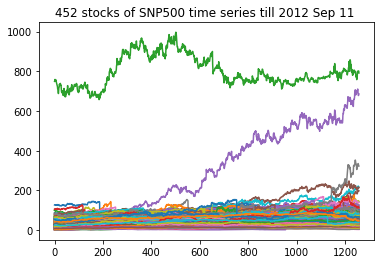

In [34]:
# plot the simple time series
plt.figure()
plt.plot(snp500_df)
plt.title("452 stocks of SNP500 time series till 2012 Sep 11 ")
plt.show()

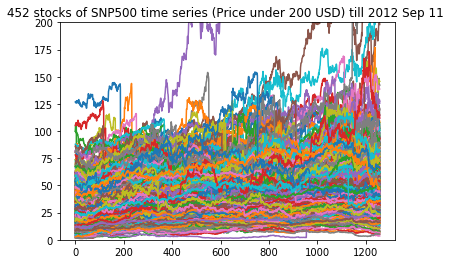

In [96]:
# plot the stocks priced under 200 USD
plt.figure()
plt.plot(snp500_df)
plt.ylim((0,200))
plt.title("452 stocks of SNP500 time series (Price under 200 USD) till 2012 Sep 11 ")
plt.show()

# PCA: stock price increasing rate

In [100]:
# lognomral (current day - previous day) 
r = np.log(np0[:,1:]/np0[:,:-1])
r.shape

(452, 1257)

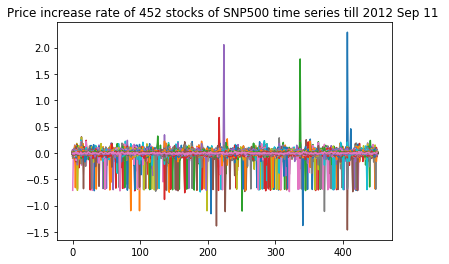

In [97]:
# plot the simple time series
plt.figure()
plt.plot(r)
plt.title("Price increase rate of 452 stocks of SNP500 time series till 2012 Sep 11 ")
plt.show()

/disk/r103/wangmeilan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


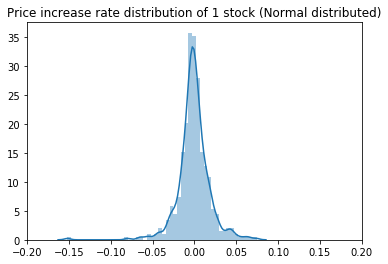

In [99]:
# plot one firm price increase rate distribution
plt.figure()
sns.distplot(r[:,0])
plt.xlim(-0.2, 0.2)
plt.title("Price increase rate distribution of 1 stock (Normal distributed)")
plt.show()

/disk/r103/wangmeilan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


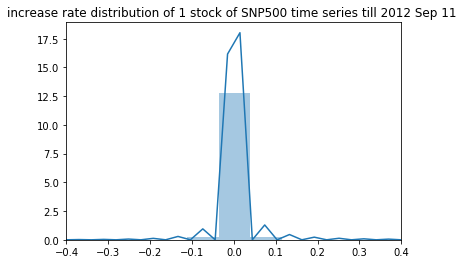

In [13]:
# plot the overall distribution of price increase rate
plt.figure()
sns.distplot(np.ndarray.flatten(r))
plt.xlim(-0.4, 0.4)
plt.title("Price increase rate distribution of 1 stock of SNP500 time series till 2012 Sep 11 ")
plt.show()

In [79]:
r_pca = PCA(svd_solver='arpack') # component_n need to be set later
r_pca.fit(r)
r_pca_ev = r_pca.explained_variance_ratio_

Y = r_pca.components_

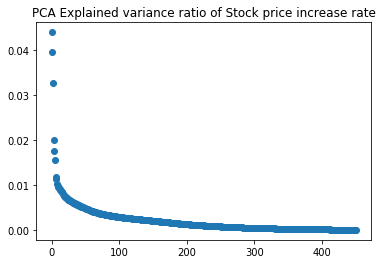

In [101]:
# plot the pca explained variance
plt.figure()
plt.plot(r_pca_ev, 'o')
plt.title("PCA Explained variance ratio of Stock price increase rate")
plt.show()

## Find Price increase rate distribution outliers use IQR

In [114]:
r_df = pd.DataFrame(r.transpose())
r_df.columns = code_table['code']

Q1 = r_df.quantile(0.25)
Q3 = r_df.quantile(0.75)
IQR = Q3 - Q1

# print the outliers
r_trans = r_df
print(r_trans.shape)

df_iqr = (r_trans < (Q1 - 75 * IQR)) |(r_trans > (Q3 + 75 * IQR))
print(df_iqr.shape)

df_select = df_iqr.apply(sum, axis=0)
df_outlier = df_select.loc[df_select != 0]
print(df_outlier.shape)
print(df_outlier)

(1257, 452)
(1257, 452)
(3,)
code
"HCBK"    1
"L"       1
"PGR"     1
dtype: int64


In [115]:
# find information of the three outlier comp
outlier_info = code_table[(code_table['code'] == df_outlier.index[0]) | (code_table['code'] == df_outlier.index[1]) |  (code_table['code'] == df_outlier.index[2])]

# find outliers price increase rate distribution
r_ex_out = r_df.drop(['"HCBK"','"L"','"PGR"'], axis=1)

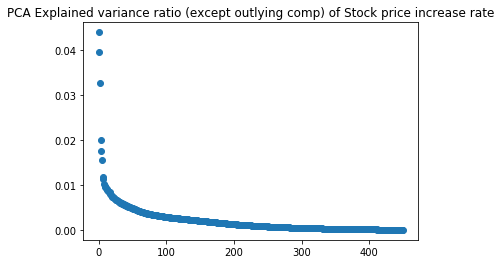

In [116]:
r_ex_pca = PCA(svd_solver='arpack') # component_n need to be set later
r_ex_pca.fit(r)
r_ex_pca_ev = r_ex_pca.explained_variance_ratio_

r_ex_Y = r_ex_pca.components_

# plot the pca explained variance
plt.figure()
plt.plot(r_ex_pca_ev, 'o')
plt.title("PCA Explained variance ratio (except outlying comp) of Stock price increase rate")
plt.show()

In [157]:
r_ex_Y.shape

(451, 1257)

## PCA: project over PC1 & PC2
- PC1 & PC2 contribute more than 8% ratio

In [122]:
# first 2 components
PC2 = r_ex_Y[:2,:].transpose()

# project original data into low dimension space by PC1 & PC2
r_low_pc2 = np.dot (r,PC2)

prj = pd.DataFrame(r_low_pc2)
prj.columns = ['PC1', 'PC2']

<Figure size 432x288 with 0 Axes>

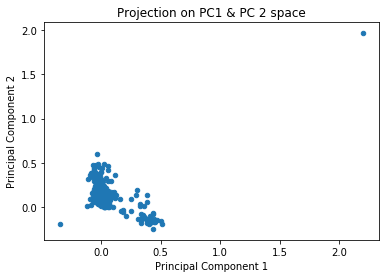

In [135]:
# plot original data on the low dimension space
plt.figure()
prj.plot.scatter(x='PC1',y='PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Projection on PC1 & PC 2 space")
plt.show()

In [143]:
# exclude 2 outliers in PC1 x PC2 space
df_out = prj[(prj['PC1'] > 1) | (prj['PC1'] < -0.25)]
df_out

,PC1,PC2
273,-0.345129,-0.194489
407,2.199773,1.966702


In [145]:
# find the information for the two outlier companies
out_comp = code_table.iloc[[273,407],:]
out_comp

,code,name,class
273,"""MSFT""","""Microsoft Corp.""","""Information Technology"""
407,"""TIE""","""Titanium Metals Corp""","""Materials"""


## Exclude outlier then PCA

In [146]:
snp_drop = snp500_df.drop(['"MSFT"','"TIE"'],axis=1)
print(snp500_df.shape, snp_drop.shape)

(1258, 452) (1258, 450)


In [148]:
# lognomral (current day - previous day) 
r_drop = np.log(np.array(snp_drop.transpose().iloc[:,1:])/np.array(snp_drop.transpose().iloc[:,:-1]))
r_drop.shape

(450, 1257)

In [152]:
r_drop_pca = PCA(svd_solver='arpack') # component_n need to be set later
r_drop_pca.fit(r)
r_drop_pca_ev = r_drop_pca.explained_variance_ratio_

r_drop_Y = r_drop_pca.components_

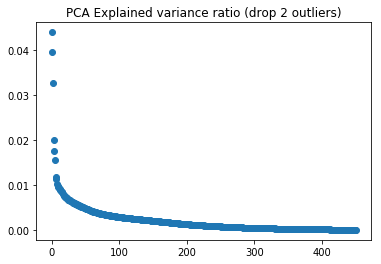

In [153]:
# plot the pca explained variance
plt.figure()
plt.plot(r_drop_pca_ev, 'o')
plt.title("PCA Explained variance ratio (drop 2 outliers)")
plt.show()

In [154]:
# project on first two component (contribute over 80%)

# first 2 components
PC2 = r_drop_Y[:2,:].transpose()

# project original data into low dimension space by PC1 & PC2
r_low_pc2 = np.dot (r_drop,PC2)

prj = pd.DataFrame(r_low_pc2)
prj.columns = ['PC1', 'PC2']

<Figure size 432x288 with 0 Axes>

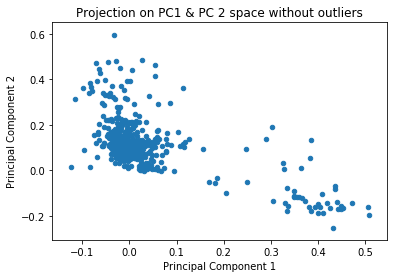

In [156]:
# plot original data on the low dimension space
plt.figure()
prj.plot.scatter(x='PC1',y='PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Projection on PC1 & PC 2 space without outliers")
plt.show()

## PCA: each industry class
- Is there dominant features (e.g. leading firms) in each industry ?

In [16]:
snp_trans = pd.DataFrame(np0)
snp_trans['code'] = code_table['code']
snp_trans['class'] = code_table['class']

snp_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,1250,1251,1252,1253,1254,1255,1256,1257,code,class
0,126.75,126.27,127.19,127.07,125.70,127.69,126.62,126.54,127.98,127.02,...,84.93,84.49,86.05,86.26,86.07,85.40,85.09,84.32,"""MMM""","""Industrials"""
1,30.51,30.69,31.97,31.78,31.17,31.87,31.60,31.00,30.52,30.27,...,60.11,60.75,61.91,63.15,62.86,61.32,61.90,61.78,"""ACE""","""Financials"""
2,40.05,40.44,40.70,38.87,39.85,39.98,39.78,39.43,39.06,37.95,...,57.23,57.60,58.26,58.35,57.88,56.98,57.23,56.15,"""ABT""","""Health Care"""
3,21.75,21.34,22.11,22.07,22.40,26.03,26.39,26.51,27.00,26.65,...,81.85,82.24,82.89,83.85,82.54,80.50,79.98,79.97,"""ANF""","""Consumer Discretionary"""
4,25.60,26.30,27.51,28.51,27.13,28.24,28.65,28.55,29.11,27.97,...,41.87,42.17,42.18,42.84,43.12,42.34,42.93,42.73,"""ADBE""","""Information Technology"""


In [17]:
# apply to 10 industry
for i in list(range(10)):
    # select one industry
    snp1 = snp_trans.loc[snp_trans['class']==class_list.iloc[i]]
    locals()["snp_class_"+str(i)] = snp1.iloc[:,:-2].transpose()
    locals()["snp_class_"+str(i)].columns = snp1['code']
    print((locals()["snp_class_"+str(i)]).shape)

(1258, 59)
(1258, 74)
(1258, 46)
(1258, 70)
(1258, 64)
(1258, 32)
(1258, 29)
(1258, 35)
(1258, 6)
(1258, 37)


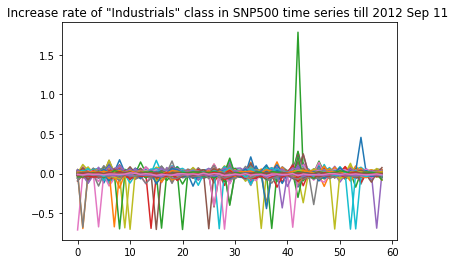

/disk/r103/wangmeilan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


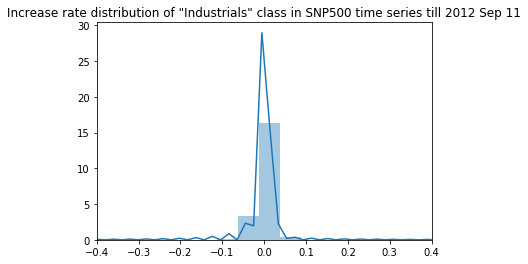

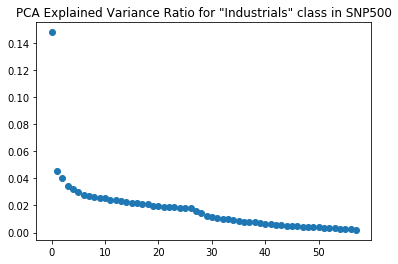

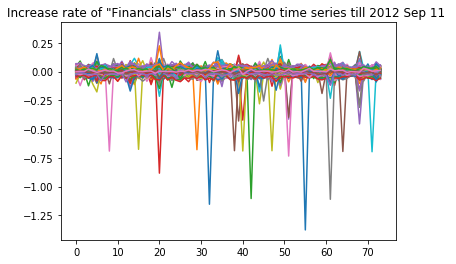

/disk/r103/wangmeilan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


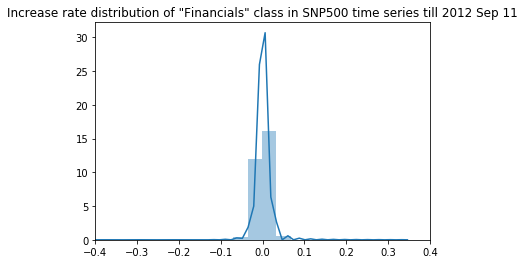

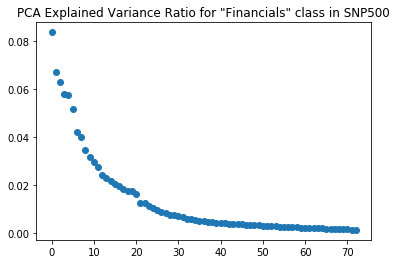

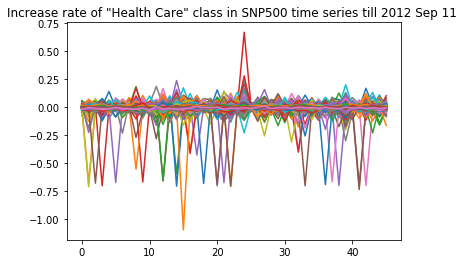

/disk/r103/wangmeilan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


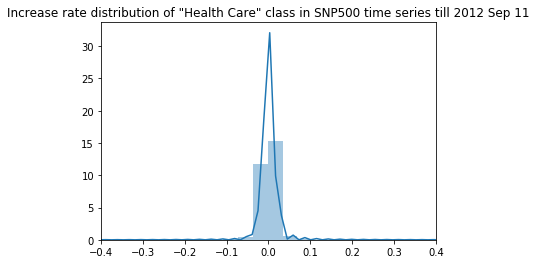

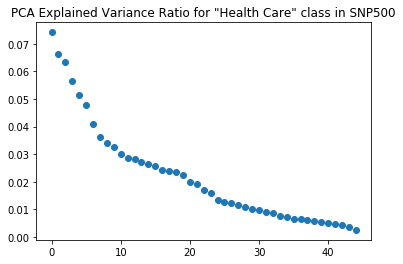

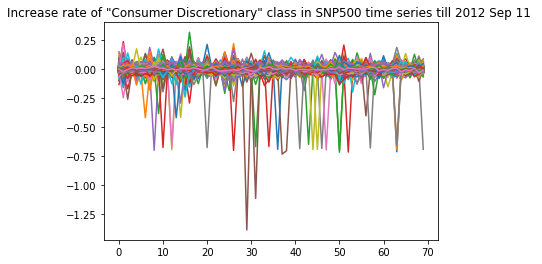

/disk/r103/wangmeilan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


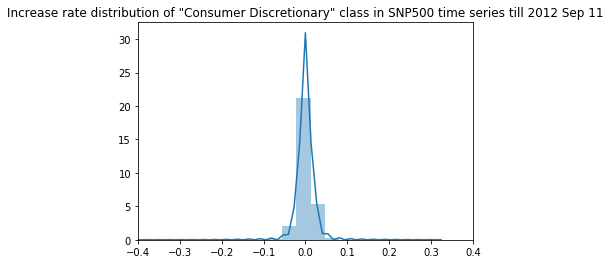

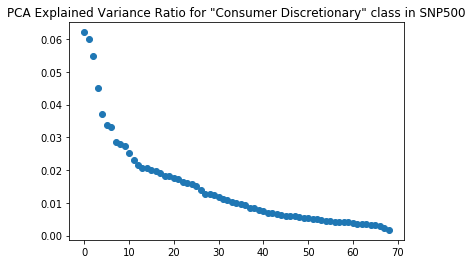

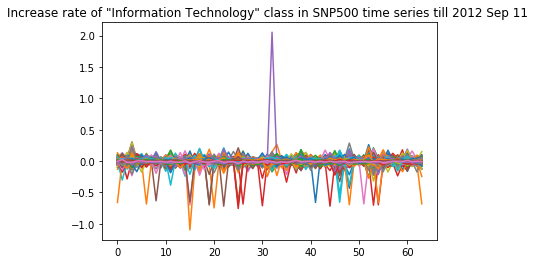

/disk/r103/wangmeilan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


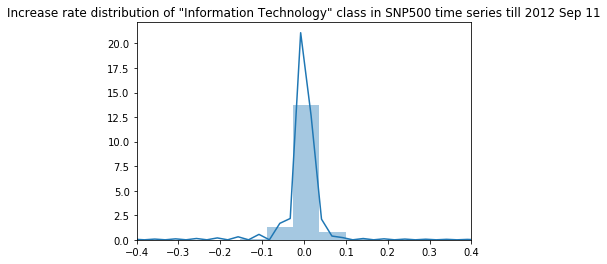

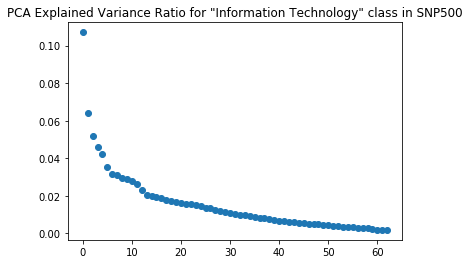

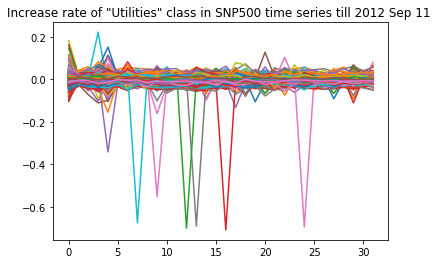

/disk/r103/wangmeilan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


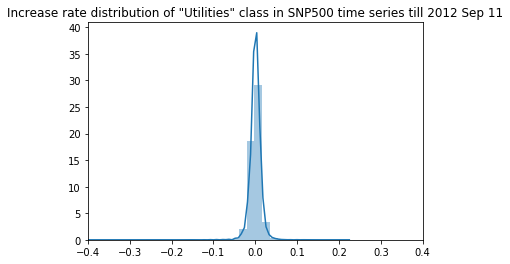

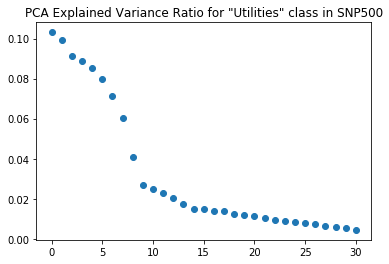

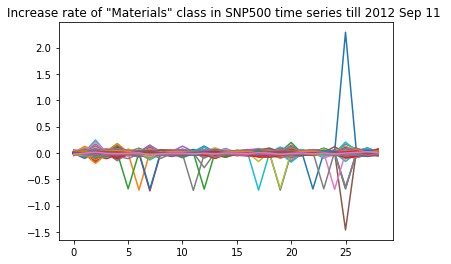

/disk/r103/wangmeilan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


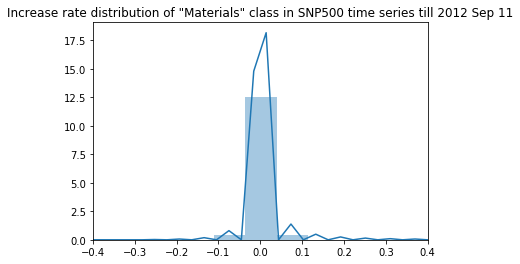

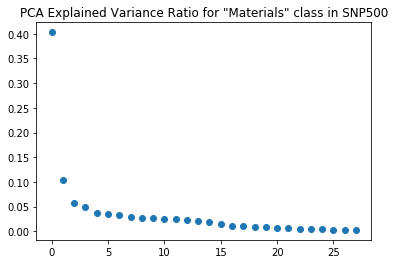

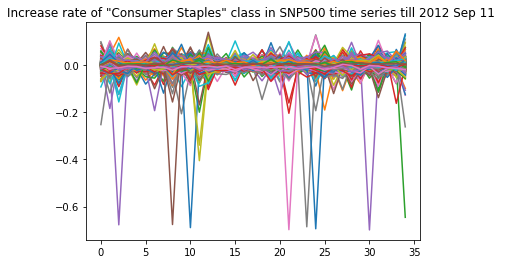

/disk/r103/wangmeilan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


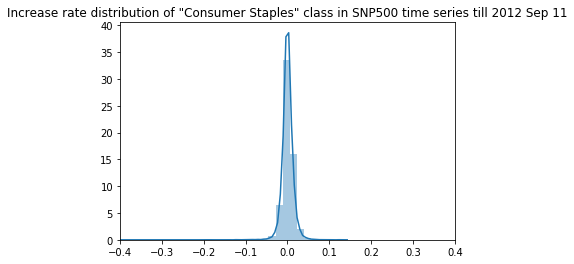

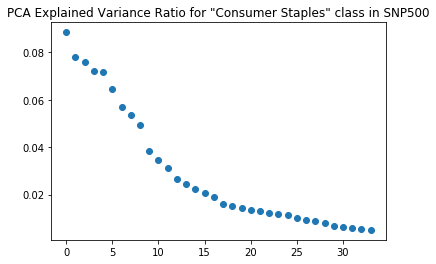

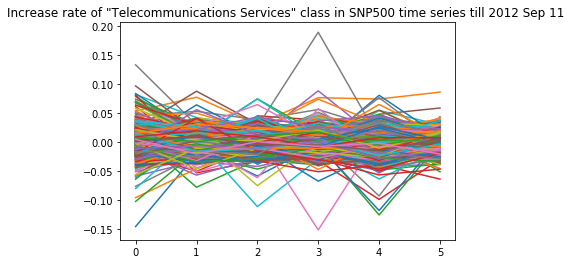

/disk/r103/wangmeilan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


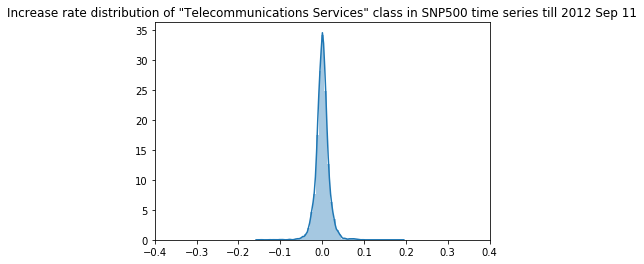

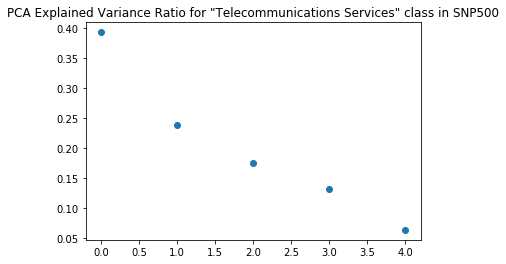

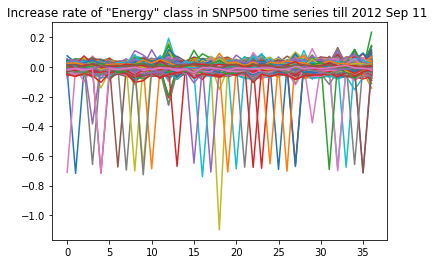

/disk/r103/wangmeilan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


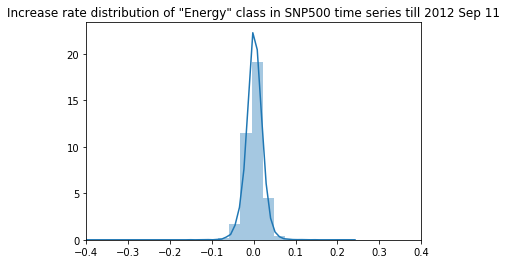

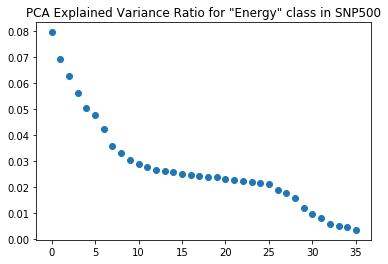

In [102]:
for i in list(range(10)):
    # lognomral (current day - previous day) 
    df1 = locals()["snp_class_"+str(i)].transpose()
    locals()["r_class_"+str(i)]= np.log(np.array(df1.iloc[:,1:])/np.array(df1.iloc[:,:-1]))
    # plot the simple time series
    plt.figure()
    plt.plot(locals()["r_class_"+str(i)])
    plt.title("Increase rate of %s class in SNP500 time series till 2012 Sep 11 " % (class_list.iloc[i]))
    plt.show()
    # plot the hist
    plt.figure()
    sns.distplot(np.ndarray.flatten(locals()["r_class_"+str(i)]))
    plt.xlim(-0.4, 0.4)
    plt.title("Increase rate distribution of %s class in SNP500 time series till 2012 Sep 11" % (class_list.iloc[i]))
    plt.show()
    # fit the pca
    r_pca = PCA(svd_solver='arpack') # component_n need to be set later
    r_pca.fit(locals()["r_class_"+str(i)])
    locals()["r_pca_ev_class_"+str(i)] = r_pca.explained_variance_ratio_
    # pca components
    locals()["Y_class_"+str(i)] = r_pca.components_
    # plot the pca eigenvalues
    plt.figure()
    plt.plot(locals()["r_pca_ev_class_"+str(i)], 'o')
    plt.title("PCA Explained Variance Ratio for %s class in SNP500" % (class_list.iloc[i]))
    plt.show()

## further analyze the sector characteristics

In [ ]:
# industrial class
snp_class_1

## PCA: time instance as feature
- Is there some dominant features in the time instance ? (eg. some events has significant impact on the market)

In [19]:
# lognomral (current day - previous day) 
r_trans = np.log(np0[:,1:]/np0[:,:-1]).transpose()
r_trans.shape

(1257, 452)

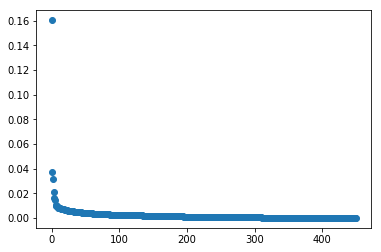

In [20]:
r_pca = PCA(svd_solver='arpack') # component_n need to be set later
r_pca.fit(r_trans)
r_trans_pca_ev = r_pca.explained_variance_ratio_
r_trans_Y = r_pca.components_

# plot the pca eigenvalues
plt.figure()
plt.plot(r_trans_pca_ev, 'o')
plt.show()

## Outliers for Material Sector
- project to PC find the material sector has a diverge -- why?
- Maybe this sector has industry groups diverge as sectors

## Stationary
- Use “Dickey-Fuller test” to determine stationarity.

## Decomposing Time Series
- Assumption: The median price of SNP500 stocks to represent the overall SNP500 index change
- Decomposte the overall SNP500 or each class in SNP500, to find if there is trend or seasonality